# PRÁCTICA BICIMAD GRUPO 18

Importamos librerías

In [ ]:
from pyspark import SparkContext
import json

Ejecutar para iniciar el objeto SparkContext

In [2]:
sc = SparkContext()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/14 18:15:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
Archivo principal con el que vamos a trabajar

In [4]:
archivo = "abril2017.json"

# cogemos las primeras 2 lineas para ver los datos
!head -2 abril2017.json

Cargamos los datos de una línea para verlos con más claridad

In [5]:
linea = '{ "_id" : { "$oid" : "59adcf3b2f38432f98f3685b" }, "user_day_code" : "48a8905d6e28ad0f4e4e64cad0b0163e7e932a31725171174ae9b7c96bc25c49", "idplug_base" : 10, "track" : { "type" : "FeatureCollection", "features" : [ { "geometry" : { "type" : "Point", "coordinates" : [ -3.68992979972222, 40.4254705 ] }, "type" : "Feature", "properties" : { "var" : "28046,ES,Madrid,Madrid,PASEO CASTELLANA,Madrid", "speed" : 0, "secondsfromstart" : 764 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.6908565, 40.4238836 ] }, "type" : "Feature", "properties" : { "var" : "28001,ES,Madrid,Madrid,PASEO RECOLETOS,Madrid", "speed" : 3.11, "secondsfromstart" : 705 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.6917461, 40.421689 ] }, "type" : "Feature", "properties" : { "var" : "28001,ES,Madrid,Madrid,PASEO RECOLETOS,Madrid", "speed" : 3.83, "secondsfromstart" : 645 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.6927568, 40.4191837997222 ] }, "type" : "Feature", "properties" : { "var" : "28014,ES,Madrid,Madrid,CALLE ALCALA,Madrid", "speed" : 4.88, "secondsfromstart" : 586 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.6932331, 40.417211 ] }, "type" : "Feature", "properties" : { "var" : "28014,ES,Madrid,Madrid,PASEO PRADO,Madrid", "speed" : 4.33, "secondsfromstart" : 526 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.69320849972222, 40.4148405997222 ] }, "type" : "Feature", "properties" : { "var" : "28014,ES,Madrid,Madrid,CALLE RUIZ DE ALARCON,Madrid", "speed" : 3.69, "secondsfromstart" : 466 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.69266579972222, 40.4125204997222 ] }, "type" : "Feature", "properties" : { "var" : "28014,ES,Madrid,Madrid,PLAZA MURILLO 22,Madrid", "speed" : 2.75, "secondsfromstart" : 407 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.6920951, 40.4101611 ] }, "type" : "Feature", "properties" : { "var" : "28014,ES,Madrid,Madrid,PASEO PRADO,Madrid", "speed" : 4.5, "secondsfromstart" : 347 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.6916426, 40.4081588 ] }, "type" : "Feature", "properties" : { "var" : "28007,ES,Madrid,Madrid,AVDA CIUDAD DE BARCELONA 2D,Madrid", "speed" : 3.69, "secondsfromstart" : 288 } } ] }, "user_type" : 1, "idunplug_base" : 22, "travel_time" : 848, "idunplug_station" : 51, "ageRange" : 5, "idplug_station" : 109, "unplug_hourTime" : { "$date" : "2017-08-31T07:00:00.000+0200" }, "zip_code" : "28005" }'
data = json.loads(linea)
for item in list(data.keys()):
    if item=="track":
        print(item)
        for subitem in data[item]['features']:
            print("    -->")
            print("      ", subitem)
    else:
        print(item)
        print(f"   {data[item]}")


_id
   {'$oid': '59adcf3b2f38432f98f3685b'}
user_day_code
   48a8905d6e28ad0f4e4e64cad0b0163e7e932a31725171174ae9b7c96bc25c49
idplug_base
   10
track
    -->
       {'geometry': {'type': 'Point', 'coordinates': [-3.68992979972222, 40.4254705]}, 'type': 'Feature', 'properties': {'var': '28046,ES,Madrid,Madrid,PASEO CASTELLANA,Madrid', 'speed': 0, 'secondsfromstart': 764}}
    -->
       {'geometry': {'type': 'Point', 'coordinates': [-3.6908565, 40.4238836]}, 'type': 'Feature', 'properties': {'var': '28001,ES,Madrid,Madrid,PASEO RECOLETOS,Madrid', 'speed': 3.11, 'secondsfromstart': 705}}
    -->
       {'geometry': {'type': 'Point', 'coordinates': [-3.6917461, 40.421689]}, 'type': 'Feature', 'properties': {'var': '28001,ES,Madrid,Madrid,PASEO RECOLETOS,Madrid', 'speed': 3.83, 'secondsfromstart': 645}}
    -->
       {'geometry': {'type': 'Point', 'coordinates': [-3.6927568, 40.4191837997222]}, 'type': 'Feature', 'properties': {'var': '28014,ES,Madrid,Madrid,CALLE ALCALA,Madrid', 'speed':

Cargamos todo el archivo y hacemos un map de cada linea quedandonos con los datos que queramos

In [6]:
 rdd_base = sc.textFile(archivo)

def mapper(line):
    dic = {}
    data = json.loads(line)
    dic['usuario'] = data['user_day_code']
    dic['user_type'] = data['user_type']
    dic['start'] = data['idunplug_station']
    dic['end'] = data['idplug_station']
    time =  data['unplug_hourTime']['$date']
    fecha , hora = time.split('T')
    año,mes,dia= fecha.split('-')
    hora , *s = hora.split(':')
    dic['año'] = int(año)
    dic['mes'] = int(mes)
    dic['dia'] = int(dia)
    dic['hora'] = int(hora)
    dic['code'] = data['zip_code']
    return dic


rdd = rdd_base.map(mapper)
rdd
rdd.take(10)

[{'usuario': 'df843a74bba22d2b363e4e96f74b99391276e71dfea92e0a11de4fe552f38173',
  'user_type': 1,
  'start': 41,
  'end': 50,
  'año': 2017,
  'mes': 4,
  'dia': 1,
  'hora': 1,
  'code': '28005'},
 {'usuario': '6a7cf4393301d25f5a2eeaff8c7ba5d406f514ebd086aa15c88173dca8eeef65',
  'user_type': 1,
  'start': 95,
  'end': 90,
  'año': 2017,
  'mes': 4,
  'dia': 1,
  'hora': 1,
  'code': '28043'},
 {'usuario': '877deab4cc256bb87e02abc1db75005ac2b66d65be88499a5142a6fa2e06eea1',
  'user_type': 1,
  'start': 15,
  'end': 16,
  'año': 2017,
  'mes': 4,
  'dia': 1,
  'hora': 1,
  'code': '28053'},
 {'usuario': '91bbf6c3ba396f84cce4e96e59be42b0824a16c8a1bf8944268f8492585c61e3',
  'user_type': 1,
  'start': 23,
  'end': 57,
  'año': 2017,
  'mes': 4,
  'dia': 1,
  'hora': 1,
  'code': '28012'},
 {'usuario': '4476cabb023b8b4473e5b6e78a1a79e0ebc8910c8e9989fc74136aa12c1527a1',
  'user_type': 1,
  'start': 23,
  'end': 43,
  'año': 2017,
  'mes': 4,
  'dia': 1,
  'hora': 1,
  'code': '28042'},
 {'us

Primero seleccionamos los tipos de usuarios 1 y 2 (eliminando 0 y 3)

In [50]:
data = rdd_base.map(mapper).filter(lambda x: x['user_type'] in [1,2])

Seleccionamos los usuarios en función de la franja horaria

In [ ]:
# Seleccionamos los usuarios de mañana [6:00-14:00)
data_mañana = data.filter(lambda x: 6 <= x['hora'] < 14)
# Seleccionamos los usuarios de tarde [14:00-22:00)
data_tarde = data.filter(lambda x: 14 <= x['hora'] < 22)
# Seleccionamos los usuarios de noche [22:00-6:00)
data_noche = data.filter(lambda x: 6 > x['hora'] or x['hora'] >= 22)
data_tarde.take(10)

Trabajamos con los datos de mañana/tarde/noche y agrupamos los que tengan la misma idplug_station

In [51]:
def group_by_variable(dato, variable):
    dato = dato.map(lambda x: (x[variable],1)).groupByKey().mapValues(len).collect()
    dato = sorted([(x[1],x[0]) for x in dato], reverse=True)
    dato = [(x[1],x[0]) for x in dato]
    return dato
data_mañana_station = group_by_variable(data_mañana,'start' )
data_tarde_station = group_by_variable(data_tarde, 'start')
data_noche_station = group_by_variable(data_noche, 'start')

station_mañana_mas= data_mañana_station[0]
station_tarde_mas = data_tarde_station[0]
station_noche_mas = data_noche_station[0]

station_mañana_menos= data_mañana_station[-1]
station_tarde_menos = data_tarde_station[-1]
station_noche_menos = data_noche_station[-1]

print("la estación más popular por la mañana es", station_mañana_mas)
print("la estación más popular por la tarde es", station_tarde_mas)
print("la estación más popular por la noche es", station_noche_mas)
print("la estación menos popular por la mañana es", station_mañana_menos)
print("la estación menos popular por la tarde es", station_tarde_menos)
print("la estación menos popular por la noche es", station_noche_menos)

la estación más popular por la mañana es (163, 1003)
la estación más popular por la tarde es (64, 1868)
la estación más popular por la noche es (57, 775)
la estación menos popular por la mañana es (2008, 1)
la estación menos popular por la tarde es (119, 193)
la estación menos popular por la noche es (119, 26)


Los porcentajes de popularidad en función de la franja horaria

In [53]:
'mañana:',(data_mañana.count()/data.count()) * 100, 'tarde:',(data_tarde.count()/data.count()) * 100, 'noche:',(data_noche.count()/data.count()) * 100

('mañana:',
 28.660577920344494,
 'tarde:',
 52.46051577837196,
 'noche:',
 15.144261276361107)

Agrupando por id de usuario para ver todos los viajes que ha realizado en un día

In [54]:
data_repetidores = data.map(lambda x: (x['usuario'],[x['start'], x['end']])).groupByKey().mapValues(tuple)\
    .filter(lambda x: len(x[1])>1)
'porcentaje de usuarios que utilizan la bici más de una vez al mes:',(data_repetidores.count()/data.count()) * 100

('porcentaje de usuarios que utilizan la bici más de una vez al mes:',
 26.10137893912275)

Usuarios que empiezan y acaban en la misma estación (da igual lo que pasa entre medias)

In [55]:
def es_ciclo(viajes):
    return viajes[0][0] == viajes[-1][1]
 
data_repetidores_ciclo = data_repetidores.filter(lambda x: es_ciclo(x[1]))
'porcentaje de usuarios con ciclo:',(data_repetidores_ciclo.count() / data_repetidores.count())*100

('porcentaje de usuarios con ciclo:', 41.997518610421835)

Cogemos aquellos que dejan la bici en una estación y vuelven a cogerla en esa misma estación en todos los trayectos que han realizado ese dia



In [56]:
def camino(viajes):
    b = True
    for i in range (len(viajes) - 1):
        b = b and viajes[i][1] == viajes[i+1][0]
    return b

data_repetidores_camino = data_repetidores.filter(lambda x: camino(x[1]))
'porcentaje de usuarios con camino:',(data_repetidores_camino.count() / data_repetidores.count())*100
    

('porcentaje de usuarios con camino:', 51.86774864194219)

Analisis de los usuarios que cumplen la condición de ciclo y camino a lo largo del año 2017

In [58]:
data_repetidores_ciclo = []
data_repetidores_camino = []
for i,mes in enumerate(['abril', 'mayo','junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']):
    archivo = mes + '2017.json'
    rdd_base = sc.textFile(archivo)
    data = rdd_base.map(mapper).filter(lambda x: x['user_type'] in [1,2])
    data_repetidores = data.map(lambda x: (x['usuario'],[x['start'], x['end']])).groupByKey().mapValues(tuple)\
    .filter(lambda x: len(x[1])>1)
    data_ciclo = data_repetidores.filter(lambda x: es_ciclo(x[1]))
    data_camino = data_repetidores.filter(lambda x: camino(x[1]))
    data_repetidores_ciclo.append((data_ciclo.count() / data_repetidores.count())*100)
    data_repetidores_camino.append((data_camino.count() / data_repetidores.count())*100)
data_repetidores_ciclo, data_repetidores_camino

([41.84022381100404,
  42.22927849600565,
  41.33903602566212,
  42.73183687257563,
  46.421960047523,
  42.39684909952797,
  41.69864717106533,
  42.88305821860208,
  41.997518610421835],
 [47.31115946534038,
  47.651268869232126,
  47.43433678784888,
  47.5846564236374,
  49.8535628436438,
  47.43287800282619,
  47.45620993503849,
  50.89382253297773,
  51.86774864194219])

Histograma de la evolución del porcentaje de usuarios con ciclos y caminos

/var/folders/ww/ysp6rw5s18j787__llfdqzgm0000gn/T/ipykernel_1250/3957672950.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


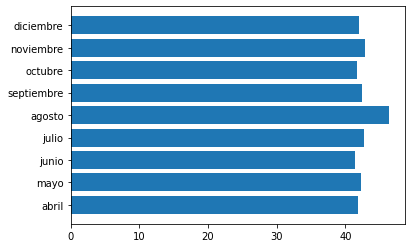

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(['abril', 'mayo','junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],data_repetidores_ciclo)
fig.show()

/var/folders/ww/ysp6rw5s18j787__llfdqzgm0000gn/T/ipykernel_1250/280678214.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


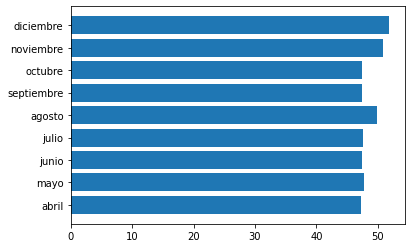

In [60]:
fig, ax = plt.subplots()
ax.barh(['abril', 'mayo','junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],data_repetidores_camino)
fig.show()

Analizamos los usuarios en función de su código postal

In [61]:
data_postal = data.filter(lambda x: x['code'] not in ['','CODIGO_POSTAL_NOT_DEF',' '])
data_postal_ord = group_by_variable(data_postal, 'code')
'zona con más usuarios:',data_postal_ord[0], 'zona con menos usuarios:',data_postal_ord[-1]

('zona con más usuarios:',
 ('28005', 16572),
 'zona con menos usuarios:',
 ('02445', 1))